In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import mysql.connector as sql
import pandas as pd 
plt.rcParams["figure.figsize"] = (10, 6)
my_conn = sql.connect(
      host="localhost", database="heartdataset", user="root", password="1234"
    )
####### end of connection ####
data = pd.read_sql("SELECT * FROM heart_dataset ",my_conn)
data.head()







C:\Users\ThanhNT\AppData\Local\Temp\ipykernel_7056\2379058121.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql("SELECT * FROM heart_dataset ",my_conn)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


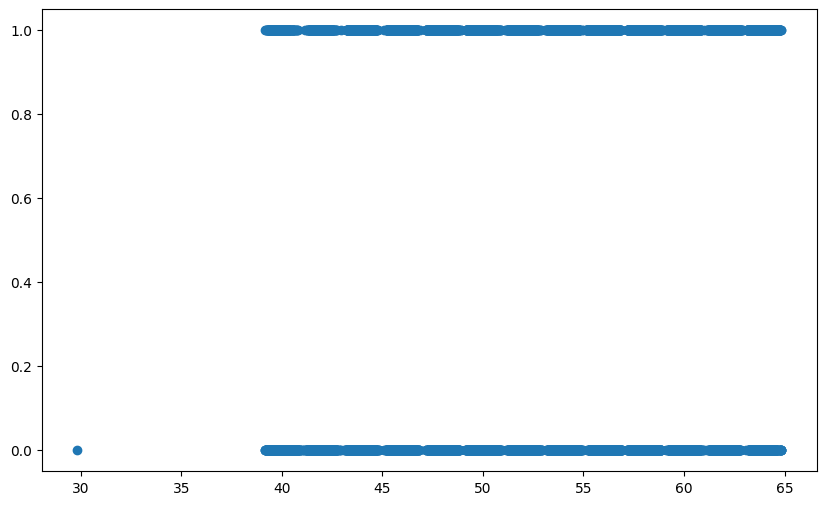

In [3]:
plt.scatter(data['age']/365, data['cardio'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    data['age']/365, data['cardio'], test_size=0.50)


In [4]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions


def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model


def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        # Derivative of loss wrt b0
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        # Derivative of loss wrt b1
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1




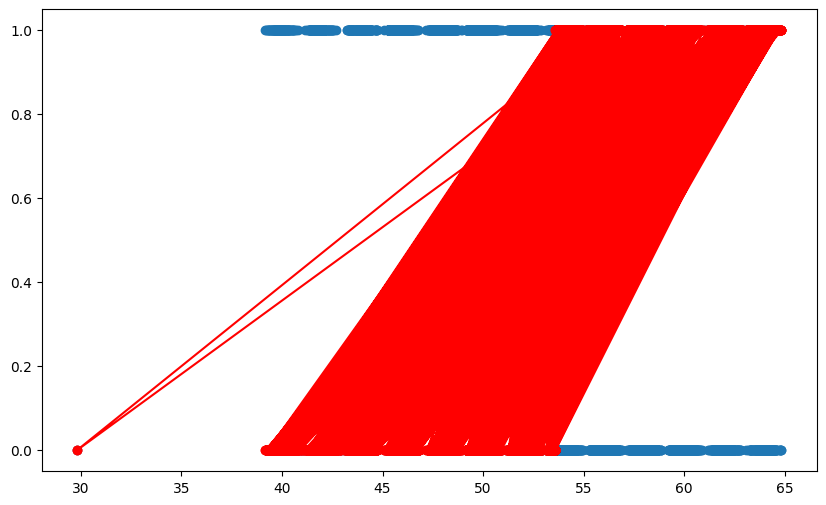

Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:1


In [5]:
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
# X_test = X_test.sort_values()  # Sorting values is optional only to see the line graph
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
        print(f"Dự đoán:{y_pred[y_test.iloc[i]]}")
print(f"Accuracy = {accuracy / len(y_pred)}")


c:\Users\ThanhNT\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


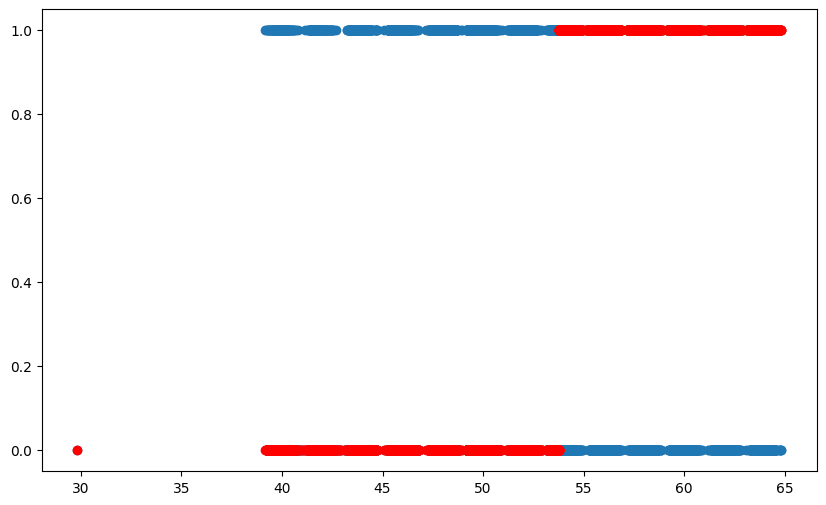


Accuracy = 59.6592217361271%


In [6]:
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()
print()
# Accuracy
print(
    f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))*100}%")
